# Part 1- Scraping Understat.com

This tutorial for scraping understat is adapted from https://sergilehkyi.com/web-scraping-advanced-football-statistics/.

In [50]:
# importing necessary web scraping, calculation, and visualization libraries
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import statistics
import numpy as np
import math
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Franklin Gothic Medium', 'Franklin Gothic Book']
from mplsoccer.pitch import Pitch

In [51]:
# information necessary to produce shot map with accurate colouring
base_url = 'https://understat.com/player/531'

In [52]:
# reading necessary content out of understat.com
url = base_url
res = requests.get(url)
soup = BeautifulSoup(res.content,"lxml")

scripts = soup.find_all('script')
strings = scripts[3].string

In [53]:
# converting raw website data into dictionary containing necessary content
ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data)

# Part 2- Data Processing

This takes the formatted JSON data from Understat.com and converts it into a readable format using the Pandas library.

In [54]:
# converting dictionary into Pandas DataFrame conta
finaldata = pd.DataFrame.from_dict(data)
finaldata = finaldata[finaldata['situation'] != 'Penalty']
finaldata

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,55305,2,SavedShot,0.764000015258789,0.345,0.011343376711010933,Michail Antonio,h,531,OpenPlay,2015,RightFoot,235,West Ham,Stoke,0,0,2015-12-12 19:00:00,None,Aerial
1,55306,4,BlockedShot,0.8180000305175781,0.26399999618530273,0.02422472834587097,Michail Antonio,h,531,OpenPlay,2015,LeftFoot,235,West Ham,Stoke,0,0,2015-12-12 19:00:00,Cheikhou Kouyaté,Pass
2,55318,55,MissedShots,0.9030000305175782,0.485,0.04558191075921059,Michail Antonio,h,531,OpenPlay,2015,Head,235,West Ham,Stoke,0,0,2015-12-12 19:00:00,Aaron Cresswell,Aerial
3,55319,60,SavedShot,0.904000015258789,0.620999984741211,0.07481948286294937,Michail Antonio,h,531,OpenPlay,2015,RightFoot,235,West Ham,Stoke,0,0,2015-12-12 19:00:00,Angelo Ogbonna,Chipped
4,55332,80,BlockedShot,0.825,0.6079999923706054,0.05477369204163551,Michail Antonio,h,531,OpenPlay,2015,RightFoot,235,West Ham,Stoke,0,0,2015-12-12 19:00:00,Cheikhou Kouyaté,BallRecovery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,428665,25,BlockedShot,0.870999984741211,0.6029999923706054,0.09253901988267899,Michail Antonio,h,531,OpenPlay,2021,LeftFoot,16401,West Ham,Crystal Palace,2,2,2021-08-28 14:00:00,Aaron Cresswell,Pass
375,428668,32,BlockedShot,0.85,0.32599998474121095,0.047293521463871,Michail Antonio,h,531,OpenPlay,2021,LeftFoot,16401,West Ham,Crystal Palace,2,2,2021-08-28 14:00:00,Declan Rice,BallRecovery
376,428678,67,Goal,0.9119999694824219,0.6880000305175781,0.2952220141887665,Michail Antonio,h,531,OpenPlay,2021,LeftFoot,16401,West Ham,Crystal Palace,2,2,2021-08-28 14:00:00,None,None
377,429871,46,SavedShot,0.8780000305175781,0.2989999961853027,0.049746885895729065,Michail Antonio,a,531,OpenPlay,2021,RightFoot,16411,Southampton,West Ham,0,0,2021-09-11 14:00:00,Said Benrahma,Pass


In [55]:
# resizing pitch dimensions to 104x68 for mplsoccer library
x = []

for i in finaldata['X']:
    x += [float(i)*104]

finaldata['X'] = x

y = []

for i in finaldata['Y']:
    y += [float(i)*68]

finaldata['Y'] = y

xG = []

for i in finaldata['xG']:
    xG += [float(i)]

finaldata['xG'] = xG

# Part 3- Plotting data using mplsoccer

This gives an example of the capabilities of Understat data by plotting it using the mplsoccer library.

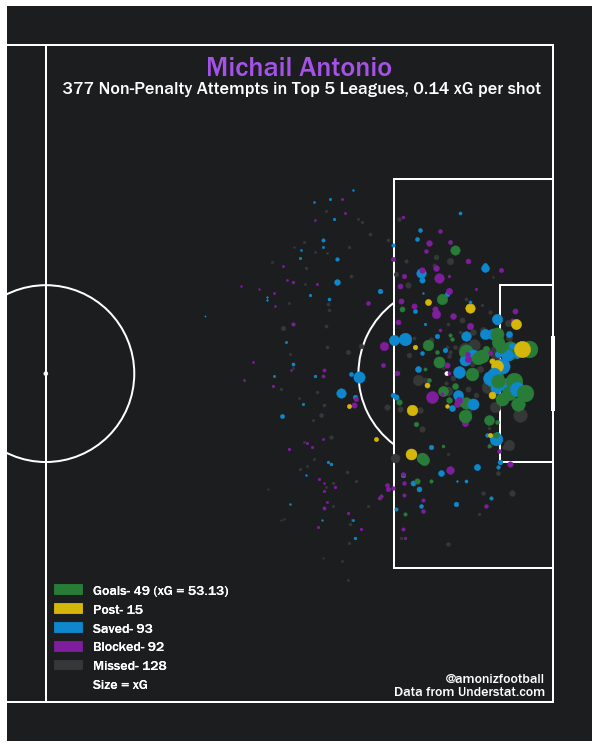

In [56]:
# setting player name on the top of the visualization
pn = finaldata['player'][0]

# drawing half football pitch
plt.style.use('ggplot')
pitch = Pitch(orientation='horizontal', view='half', pitch_type='uefa', figsize=(16,10.5), \
              pitch_color='#1b1d1e')
fig, ax = pitch.draw()

# setting counters for shots and outcomes and looping through as they are plotted
goal = 0
post = 0
saved = 0
blocked = 0
missed = 0
total = 0

for i in range(len(finaldata)):
    if list(finaldata['result'])[i] == "MissedShots":
        plt.scatter(list(finaldata['X'])[i], list(finaldata['Y'])[i], s=list(finaldata['xG'])[i]*300, \
                    c='xkcd:dark grey', zorder=99)
        missed +=1
        total +=1
    elif list(finaldata['result'])[i] == 'SavedShot':
        plt.scatter(list(finaldata["X"])[i],list(finaldata["Y"])[i],s=list(finaldata['xG'])[i]*300, \
                    color="xkcd:water blue", zorder=100)
        saved +=1
        total +=1
    elif list(finaldata['result'])[i] == 'ShotOnPost':
        plt.scatter(list(finaldata["X"])[i],list(finaldata["Y"])[i],s=list(finaldata['xG'])[i]*300,\
                    color="xkcd:dark yellow", zorder=100)
        post +=1
        total +=1
    elif list(finaldata['result'])[i] == 'BlockedShot':
        plt.scatter(list(finaldata["X"])[i],list(finaldata["Y"])[i],s=list(finaldata['xG'])[i]*300, \
                    color="xkcd:purple", zorder=100)
        blocked +=1
        total +=1
    else:
        plt.scatter(list(finaldata["X"])[i],list(finaldata["Y"])[i],s=list(finaldata['xG'])[i]*300, \
                    color="xkcd:darkish green", zorder=100)
        goal +=1
        total += 1

scatter = plt.scatter(list(finaldata['X']), list(finaldata['Y']), s=list(finaldata['xG'])[i]*300, \
                    c='white', zorder=0, alpha=0)
        
plt.text(0.5, 0.97, '\n'+pn, \
         horizontalalignment='center', verticalalignment='top', \
         color='xkcd:lightish purple', size='28', \
             transform=ax.transAxes)
plt.text(0.5, 0.945, "\n\n "+ str(total)+ " Non-Penalty Attempts in Top 5 Leagues, " + str(round(statistics.mean(list(finaldata['xG'])), 2)) +\
         " xG per shot", horizontalalignment='center', verticalalignment='top', color='white', size='18', \
             transform=ax.transAxes)
plt.text(0.92, 0.06, '@amonizfootball\nData from Understat.com', size='14', \
         horizontalalignment='right', verticalalignment='bottom', color='white', transform=ax.transAxes,zorder=1000)

# creating legend
green_patch = mpatches.Patch(color='xkcd:darkish green', label='Goals- '+str(goal)+' (xG = ' + str(round(sum(list(finaldata['xG'])), 2)) + ')')
yellow_patch = mpatches.Patch(color='xkcd:dark yellow', label='Post- '+str(post))
blue_patch = mpatches.Patch(color='xkcd:water blue', label='Saved- '+str(saved))
purple_patch = mpatches.Patch(color='xkcd:purple', label='Blocked- '+str(blocked))
red_patch = mpatches.Patch(color='xkcd:dark grey', label='Missed- '+str(missed))
blend_patch = mpatches.Patch(color='#1b1d1e', label='Size = xG')
leg = ax.legend(title_fontsize='20', framealpha=0, edgecolor='white', \
                 handles=[green_patch, yellow_patch, blue_patch, purple_patch, red_patch, blend_patch], \
                 bbox_to_anchor=(0.4,0.23), prop={'size':14}, fancybox=True) 
for text in leg.get_texts():
    plt.setp(text, color = 'white')
frame = leg.get_frame()
frame.set_color('#1b1d1e')
ax.add_artist(leg)

plt.axis('Off')

plt.show()